In [1]:
import os, re, pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline
from matplotlib.gridspec import GridSpec
from matplotlib import font_manager as fm, rcParams
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PyPDF2 import PdfFileMerger, PdfFileReader

In [2]:
illumyx_colors={'red':'#C8102E','orange':'#FF8200','yellow':'#FFC72C','green':'#97D700','blue':'#00AEC7','darkblue':'#00587C'}
culture_score_spectrum = mpl.colors.LinearSegmentedColormap.from_list('culture_score_spectrum', list(illumyx_colors.values())[0:5],N=201)
num_splits = 201
x = np.arange(num_splits)
ys = [i + x + (i*x)**2 for i in range(num_splits)]
colors_array = culture_score_spectrum(np.linspace(0, 1, len(ys)))
culture_score_colors = [colors.rgb2hex(i) for i in colors_array]



In [3]:
df = pickle.load(open('comment_topics_df.p','rb'))

In [4]:
def get_top_topics_for_division_set(full_df,divisions):
    df = full_df.loc[full_df.Division.isin(divisions),:].copy().reset_index(drop=True)
    df.dropna(axis=1,how='all',inplace=True)
    topic_list = df.columns[55:].to_list()
    topic_results = pd.DataFrame()
    topic_results['Topic'] = topic_list
    topic_results['Count'] = [df[x].count() for x in topic_list]
    topic_results['Sentiment'] = [df[x].mean() for x in topic_list]
    topic_results['Color'] = [culture_score_colors[int(topic_results.loc[x]['Sentiment']*100+100)] for x in range(0,topic_results.shape[0])]
    topic_results.sort_values(by='Count', ascending=False, inplace=True)
    topic_results.reset_index(drop=True, inplace=True)
    top_topics = topic_results.head(20)
    return top_topics

In [5]:
divisions = df.Division.unique().tolist()
for d in divisions: print(d)

Human Resources
Executives (APCO or DAPCO)
Community Engagement & Policy
Communications
Meteorology & Measurements
Technology Implementation
Planning & Climate Protection
Engineering
Compliance & Enforcement
Assessment, Inventory & Modeling
Legal
Executive & Administrative
Strategic Incentives
Information Services
My Air Online
DE&I or Legislative or Public Health
Finance


In [ ]:
# divisions = ["Legal","Finance","Human Resources"]
# top_topics = get_top_topics_for_division_set(df,divisions)

# Buyer beware...

The update function below is clunky for a lot  of reasons.   Perhaps the most obvious is that the checkboxes take up way to much vertical space.   Also, it's annoying that the axes change as you  check and uncheck boxes...

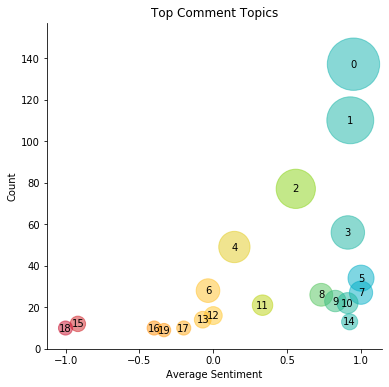

In [7]:
import plotly.graph_objects as go
from ipywidgets import interact

divisions = {k:True for k in divisions}

@interact(**divisions)
def update(**divisions):    
    fig, ax = plt.subplots(figsize=(6,6))
    division_set = [k for k,v in divisions.items() if v]
    top_topics = get_top_topics_for_division_set(df,division_set)
    plt.scatter(x=top_topics.Sentiment,
            y=top_topics.Count,
            s=top_topics.Count*20,
            color=top_topics.Color,
            alpha=0.5)
    for row in top_topics.itertuples():
        plt.text(s=str((row.Index)),
             x=row.Sentiment,
             y=row.Count,
             va='center',
             ha='center')
    plt.ylim(0,top_topics.Count[0]+20)
    #plt.xlim(-1.1,1.1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('Average Sentiment')
    plt.ylabel('Count')
    plt.title('Top Comment Topics')
    plt
    